In [1]:
 # Tensorflow / Keras
 from tensorflow import keras # for building Neural Networks
 print('Tensorflow/Keras: %s' % keras.__version__) # print version
 from keras import Input # for instantiating a keras tensor
 from keras.layers import Dense # for adding Dense layers to AE model
 from keras.models import Model # for creating a Neural Network Autoencoder mod
 # Data manipulation
 import numpy as np # for data manipulation
 print('numpy: %s' % np.__version__) # print version
 # Visualization
 import matplotlib 
import matplotlib.pyplot as plt # for plotting model loss
 print('matplotlib: %s' % matplotlib.__version__) # print version
 import seaborn as sns # for plotting neuron heatmap
 print('seaborn: %s' % sns.__version__) # print version
 # Other utilities
 import sys
 import os
 # Assign main directory to a variable
 main_dir=os.path.dirname(sys.path[0])

Tensorflow/Keras: 3.6.0
numpy: 1.26.4
matplotlib: 3.8.4
seaborn: 0.13.2


Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


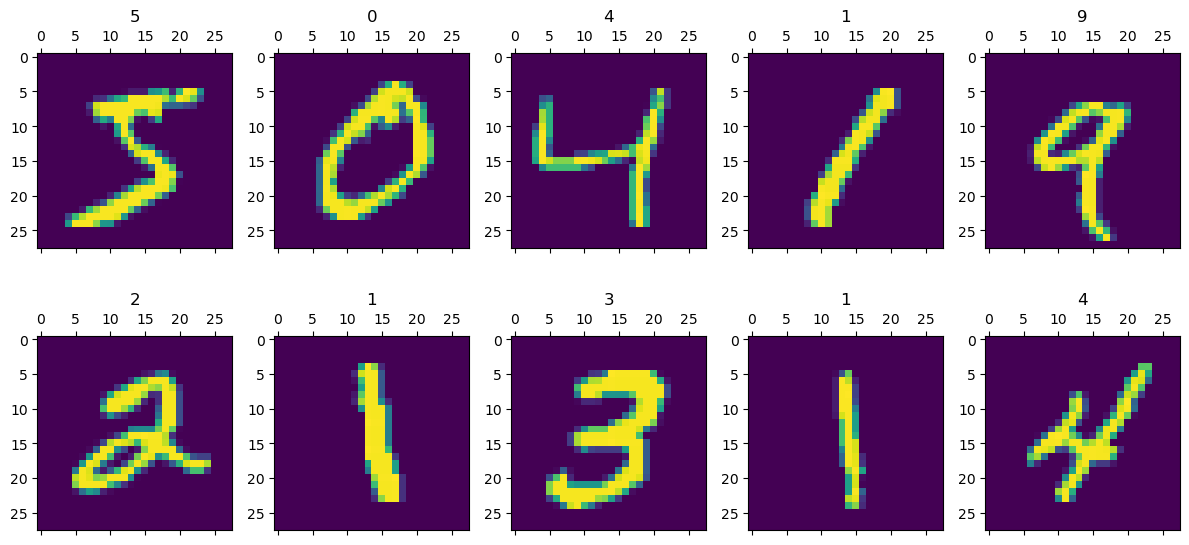

In [2]:
 # Load digits data 
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
 # Print shapes
 print("Shape of X_train: ", X_train.shape)
 print("Shape of y_train: ", y_train.shape)
 print("Shape of X_test: ", X_test.shape)
 print("Shape of y_test: ", y_test.shape)
 # Display images of the first 10 digits in the training set and their true la
 fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6))
 n=0
 for i in range(0,2):
     for j in range(0,5):
         axs[i,j].matshow(X_train[n])
         axs[i,j].set(title=y_train[n])
         n=n+1
 plt.show()


In [3]:
 # Reshape and normalize (divide by 255) input data
 X_train = X_train.reshape(60000, 784).astype("float32") / 255
 X_test = X_test.reshape(10000, 784).astype("float32") / 255
 # Print shapes
 print("New shape of X_train: ", X_train.shape)
 print("New shape of X_test: ", X_test.shape)

New shape of X_train:  (60000, 784)
New shape of X_test:  (10000, 784)


Model: "Autoencoder-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ AE-Input-Layer (InputLayer)          │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ AE-Encoder (Dense)                   │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ AE-Bottleneck (Dense)                │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ AE-Decoder (Dense)                   │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ AE-Output-Layer (Dense)              │ (None, 784)                 │          13,328 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,432 (103.25 KB)

 Trainable params: 26,432 (103.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0585
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.0308
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0278
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0269
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0263


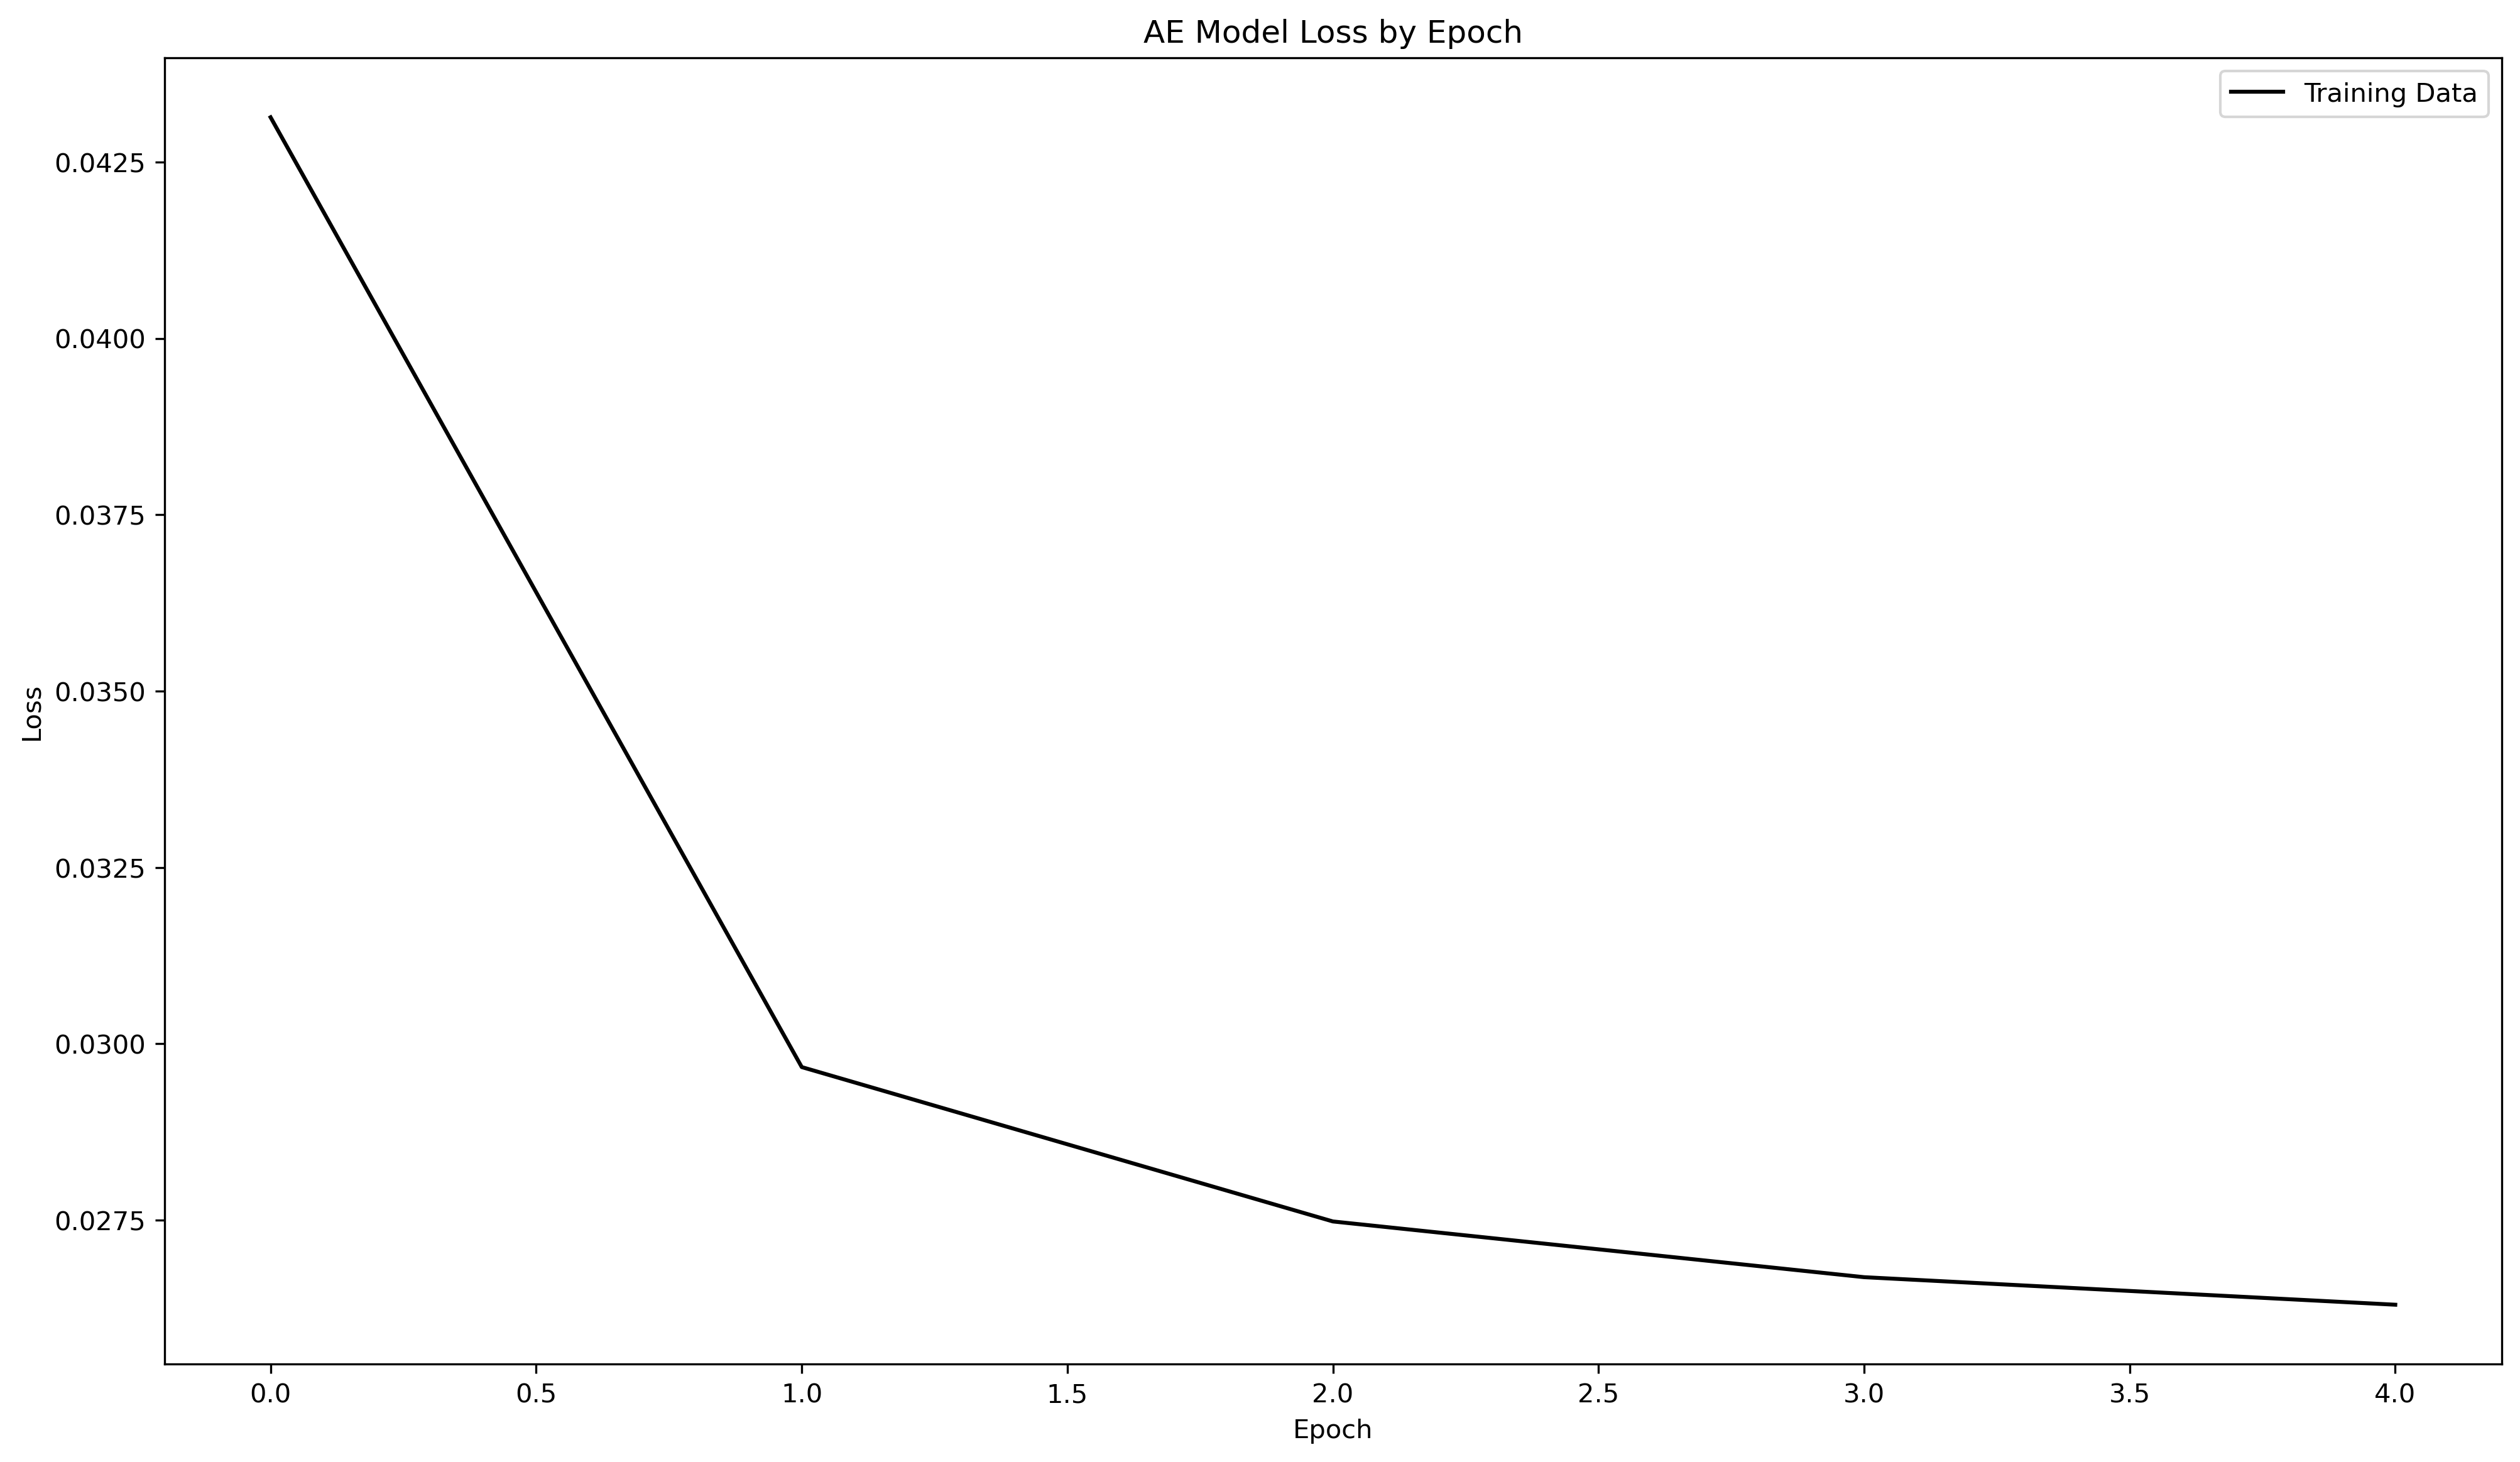

In [4]:
#----------- Build AE Model ----------#
# Shapes
AE_n_inputs = X_train.shape[1]  # No. of neurons for the input and output layers
AE_n_hidden = 16  # No. of neurons for the hidden layers (including bottleneck)

# Layers
AE_visible = Input(shape=(AE_n_inputs,), name='AE-Input-Layer')  # Input Layer
AE_enc_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Encoder')(AE_visible)
AE_bottleneck = Dense(units=AE_n_hidden, activation='relu', name='AE-Bottleneck')(AE_enc_hidden)
AE_dec_hidden = Dense(units=AE_n_hidden, activation='relu', name='AE-Decoder')(AE_bottleneck)
AE_output = Dense(units=AE_n_inputs, activation='sigmoid', name='AE-Output-Layer')(AE_dec_hidden)

# Define autoencoder model
AE_model = Model(inputs=AE_visible, outputs=AE_output, name='Autoencoder-Model')

# Compile autoencoder model
AE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(AE_model.summary())

# Fit the autoencoder model to reconstruct input
AE_history = AE_model.fit(X_train, X_train, epochs=5, batch_size=16, verbose=1)

#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
plt.title(label='AE Model Loss by Epoch', loc='center')
ax.plot(AE_history.history['loss'], label='Training Data', color='black')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#----------- Save AE Encoder Model ----------#
# Define an encoder model without the decoder
AE_encoder = Model(inputs=AE_visible, outputs=AE_bottleneck)
AE_encoder.compile(optimizer='adam', loss='mse')
AE_encoder.save(main_dir + '/data/AE_encoder.h5')


Model: "Sparse-Autoencoder-Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ SAE-Input-Layer (InputLayer)         │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ SAE-Encoder-Hidden-Layer (Dense)     │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ SAE-Bottleneck-Layer (Dense)         │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ SAE-Decoder-Hidden-Layer (Dense)     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ SAE-Output-Layer (Dense)             │ (None, 784)                 │          13,328 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,432 (103.25 KB)

 Trainable params: 26,432 (103.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0609 - val_loss: 0.0335
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0325 - val_loss: 0.0293
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0288 - val_loss: 0.0269
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0271 - val_loss: 0.0262
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0264 - val_loss: 0.0257


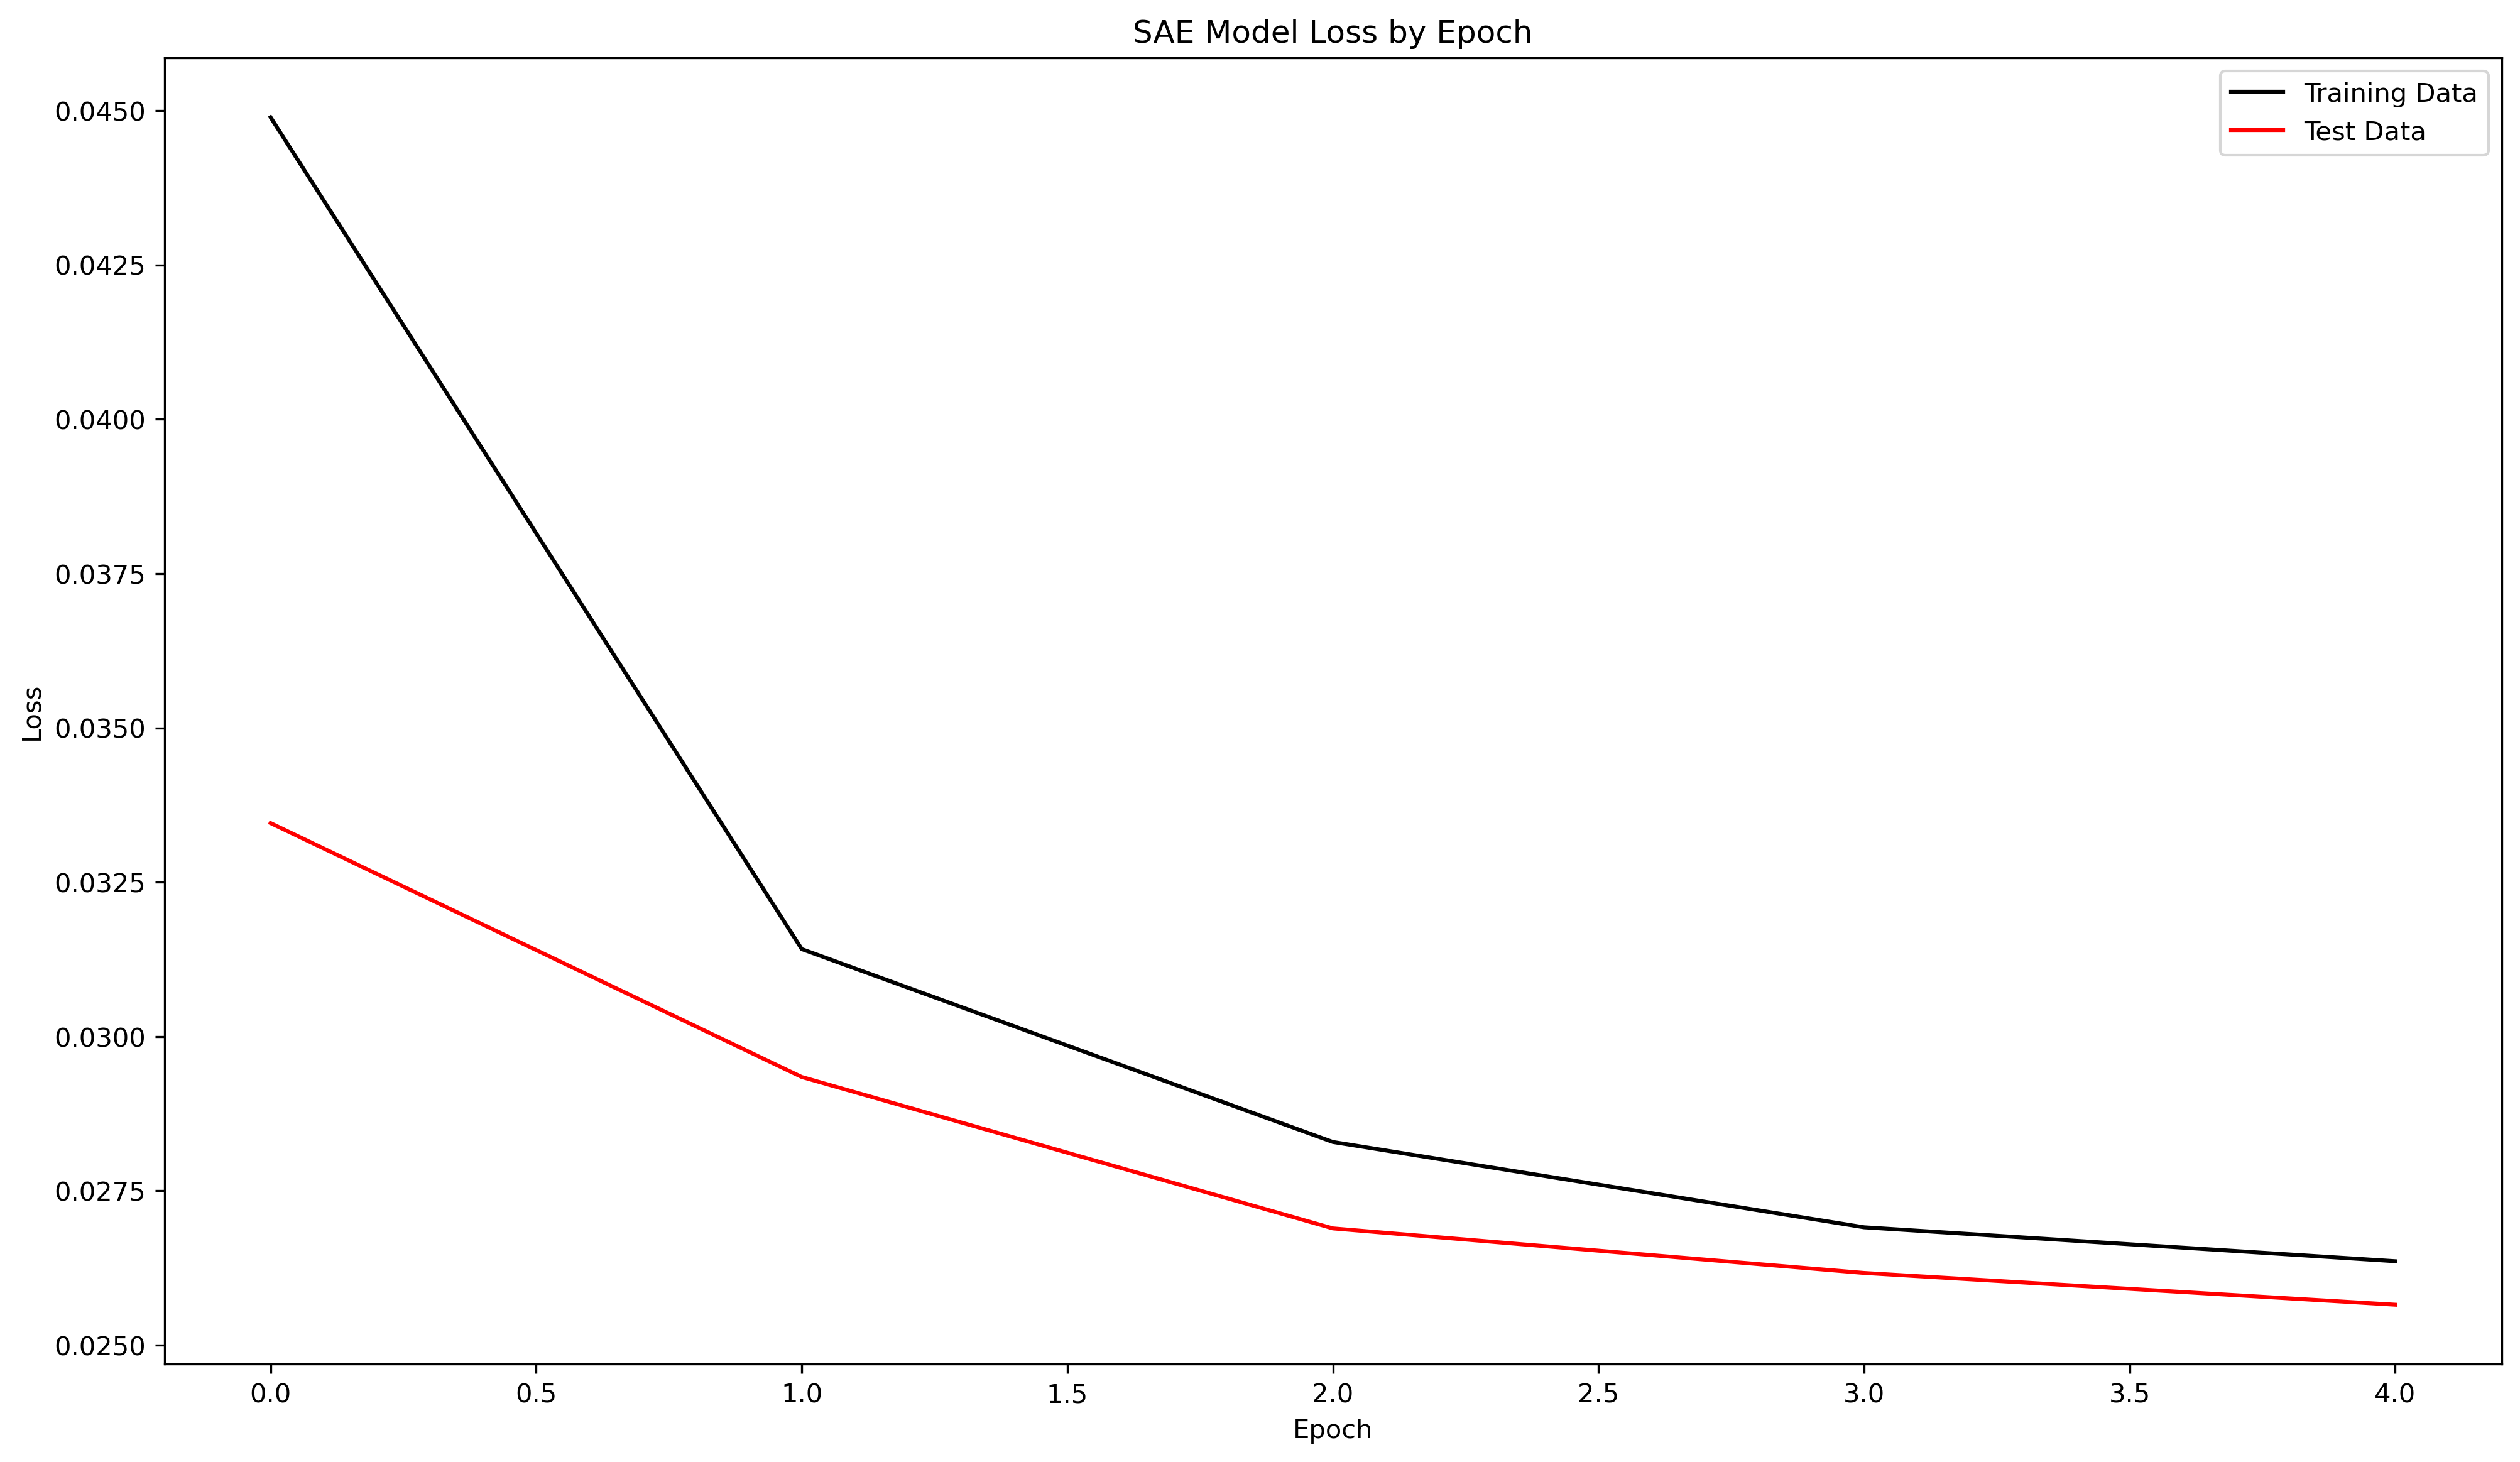

In [32]:
#----------- Build SAE Model ----------#
# Shapes
SAE_n_inputs = X_train.shape[1]  # No. of neurons for the input and output layers
SAE_n_hidden = 16  # No. of neurons for the hidden layers (including bottleneck)

# Layers
SAE_visible = Input(shape=(SAE_n_inputs,), name='SAE-Input-Layer')  # Input layer
SAE_enc_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Encoder-Hidden-Layer')(SAE_visible)
SAE_bottleneck = Dense(units=SAE_n_hidden, activation='relu', activity_regularizer=keras.regularizers.l1(0.00000001), name='SAE-Bottleneck-Layer')(SAE_enc_hidden) 
SAE_dec_hidden = Dense(units=SAE_n_hidden, activation='relu', name='SAE-Decoder-Hidden-Layer')(SAE_bottleneck)
SAE_output = Dense(units=SAE_n_inputs, activation='sigmoid', name='SAE-Output-Layer')(SAE_dec_hidden)

# Define Sparse autoencoder model
SAE_model = Model(inputs=SAE_visible, outputs=SAE_output, name='Sparse-Autoencoder-Model')

# Compile Sparse autoencoder model
SAE_model.compile(optimizer='adam', loss='mse')

# Print model summary
print(SAE_model.summary())

# Fit the Sparse autoencoder model to reconstruct input
SAE_history = SAE_model.fit(X_train, X_train, validation_data=(X_test, X_test), epochs=5, batch_size=16, verbose=1)

#---------- Plot a loss chart ----------#
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)
plt.title(label='SAE Model Loss by Epoch', loc='center')
ax.plot(SAE_history.history['loss'], label='Training Data', color='black')
ax.plot(SAE_history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()
plt.show()

#----------- Save SAE Encoder Model ----------#
# Define an encoder model without the decoder
SAE_encoder = Model(inputs=SAE_visible, outputs=SAE_bottleneck)

# Compile encoder model
SAE_encoder.compile(optimizer='adam', loss='mse')

# Save the encoder model to file
main_dir = './'  # Update the main directory to save the model
SAE_encoder.save(main_dir + '/data/SAE_encoder.h5')


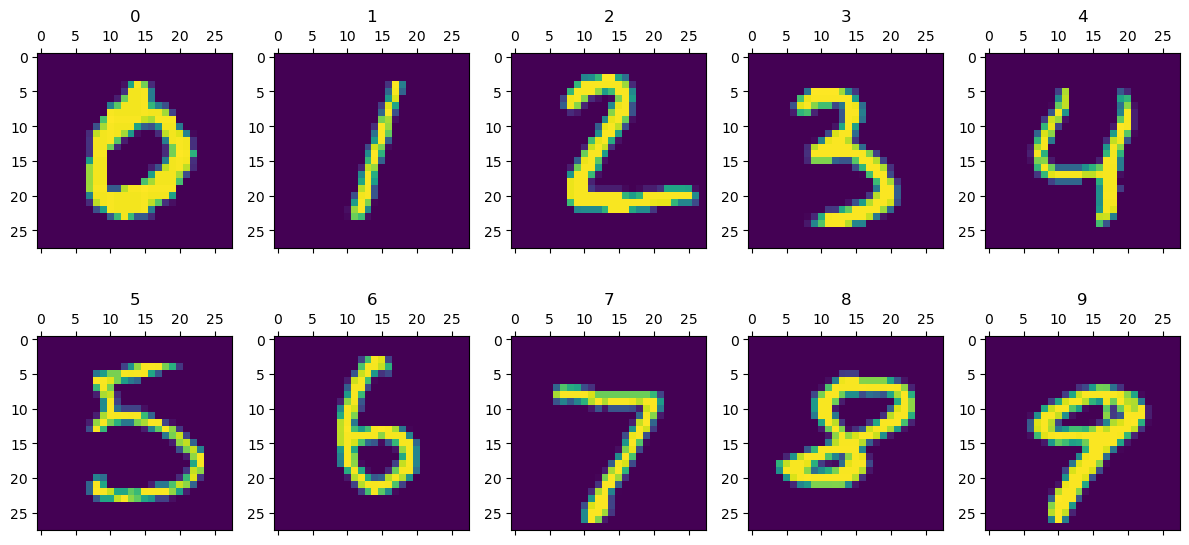

In [34]:
 # Reshape back
 X_test_back = X_test.reshape(10000, 28, 28)
 # Display select images of digits in the testing set and their true lables
 fig, axs = plt.subplots(2, 5, sharey=False, tight_layout=True, figsize=(12,6))
 imglist=[3,2,1,32,4,15,21,0,61,9]
 n=0
 for i in range(0,2):
    for j in range(0,5):
        k=imglist[n]
        axs[i,j].matshow(X_test_back[k])
        axs[i,j].set(title=y_test[k])
        n=n+1
 plt.show()

In [36]:
 imglist=[3,2,1,32,4,15,21,0,61,9]
 # Encode images with AE encoder
 for i in imglist:
    enc=AE_encoder.predict(X_test[i].reshape(1,784))
    if i==imglist[0]: 
       AE_encoded_imgs=np.copy(enc) 
    else:
       AE_encoded_imgs=np.concatenate((AE_encoded_imgs, enc))
 #AE_encoded_imgs
 # Encode images with SAE encoder
 for i in imglist:
     enc=SAE_encoder.predict(X_test[i].reshape(1,784))
     if i==imglist[0]: 
         SAE_encoded_imgs=np.copy(enc) 
     else:
        SAE_encoded_imgs=np.concatenate((SAE_encoded_imgs, enc))
 #SAE_encoded_imgs

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


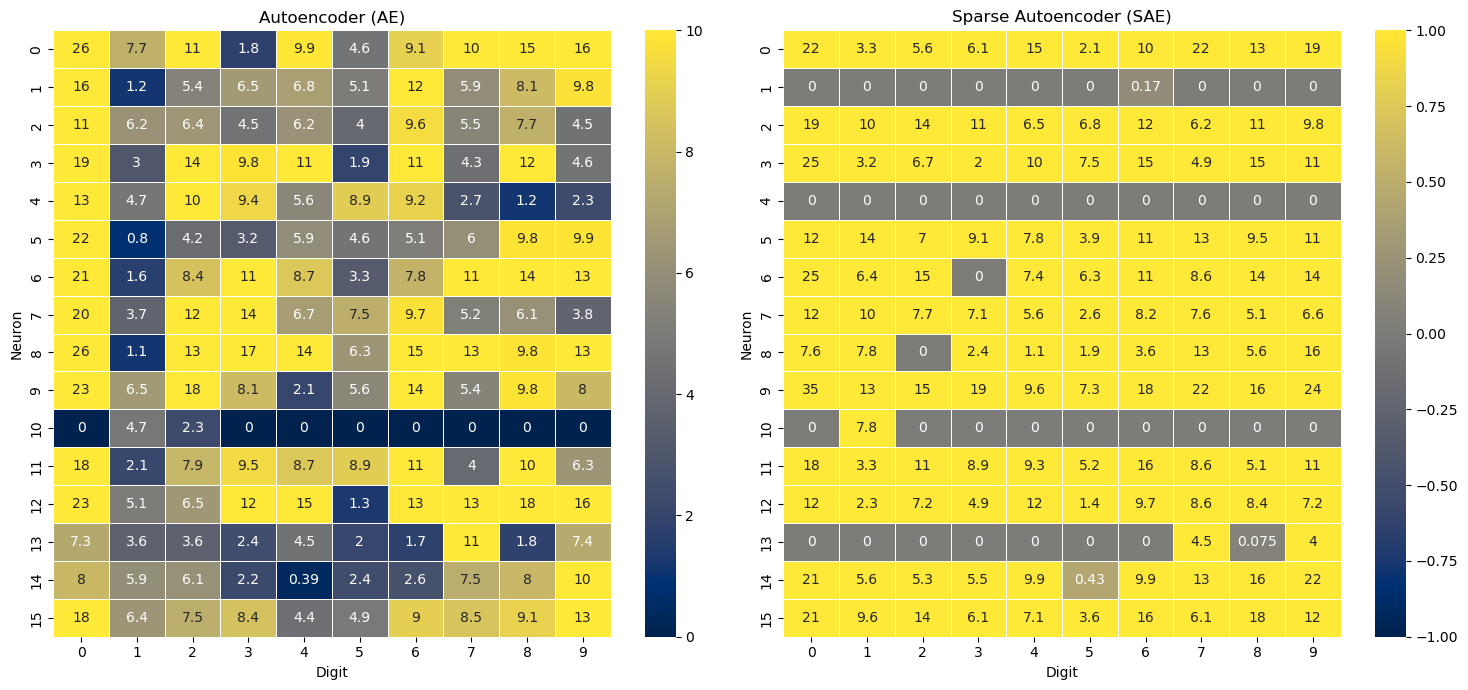

In [38]:
# Plot SNS heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(15, 7))  # Fixed syntax and added figsize for better layout
sns.heatmap(AE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=0, vmax=10, ax=ax1, cmap='cividis')  # Added `ax` parameter and `cmap`
sns.heatmap(SAE_encoded_imgs.transpose(), linewidth=0.5, annot=True, vmin=-1, vmax=1, ax=ax2, cmap='cividis')  # Added `ax` parameter and `cmap`
ax1.set(title='Autoencoder (AE)', xlabel='Digit', ylabel='Neuron')
ax2.set(title='Sparse Autoencoder (SAE)', xlabel='Digit', ylabel='Neuron')
plt.tight_layout()  # Ensures proper spacing
plt.show()
